In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
%matplotlib inline

In [2]:
data = pd.read_csv("../data/StockX-Data-Consolidated.csv")

## EDA on Target Value

In [3]:
y = pd.DataFrame(data[['Pct_change']])
x = data.loc[:, ~data.columns.isin(['Pct_change'])]

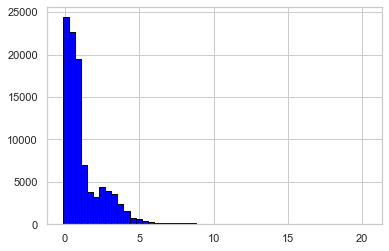

In [29]:
plt.hist(y['Pct_change'], color = 'blue', edgecolor = 'black',
         bins = 50)
plt.show()

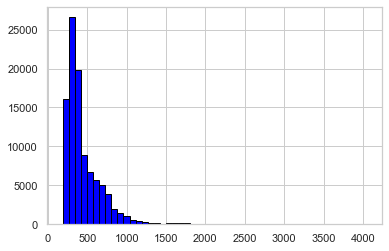

In [30]:
plt.hist(x['Sale Price'], color = 'blue', edgecolor = 'black',
         bins = 50)
plt.show()

## EDA on Y using voilin plot and box plot

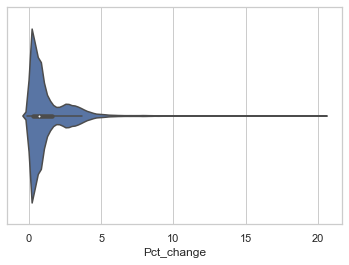

In [6]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=y['Pct_change'])

## Train an Isolation Forest on log(Y)

In [38]:
model=IsolationForest(n_estimators=100, max_samples='auto', contamination= 0.05 ,max_features=1.0)
model.fit(y[['Pct_change']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.05,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [39]:
y['scores']=model.decision_function(y[['Pct_change']])
y['anomaly']=model.predict(y[['Pct_change']])

## Print Anomoly Datapoints

In [40]:
anomaly=y.loc[y['anomaly']==-1]
anomaly_index=list(anomaly.index)

In [47]:
anomaly[0:19]

,Pct_change,scores,anomaly
73,4.281818,-0.013150,-1
112,5.150000,-0.071785,-1
128,9.000000,-0.193266,-1
129,5.812500,-0.108760,-1
130,7.400000,-0.157044,-1
131,7.281250,-0.154492,-1
132,6.200000,-0.120339,-1
149,11.894737,-0.226630,-1
150,11.236842,-0.219403,-1
151,4.312500,-0.013564,-1


In [42]:
mean = np.array([[np.mean(y['Pct_change']),np.mean(y.loc[y['anomaly']==1]['Pct_change']),np.mean(anomaly['Pct_change'])]])
median = np.array([[np.median(y['Pct_change']),np.median(y.loc[y['anomaly']==1]['Pct_change']),np.median(anomaly['Pct_change'])]])
comp = pd.DataFrame(index = ['mean','median'],columns= ['whole','normal','anamaly'])
comp.iloc[0] = mean
comp.iloc[1] = median

In [43]:
comp

,whole,normal,anamaly
mean,1.24824,1.02888,5.42569
median,0.704545,0.681818,4.96154


In [44]:
y['scores']=model.decision_function(y[['Pct_change']])
y['anomaly']=model.predict(y[['Pct_change']])

,Pct_change,scores,anomaly
0,3.986364,0.013010,1
1,2.113636,0.065461,1
2,2.136364,0.067519,1
3,3.886364,0.023577,1
4,2.763636,0.091834,1
5,2.627273,0.095926,1
6,2.563636,0.100169,1
7,1.090909,0.127253,1
8,1.113636,0.117634,1
9,1.113636,0.117634,1


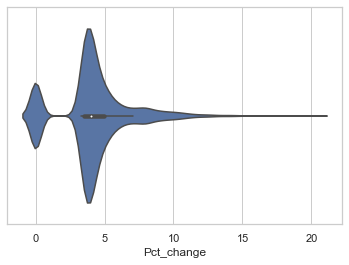

In [26]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=anomaly["Pct_change"])

## Compare group and the anomaly

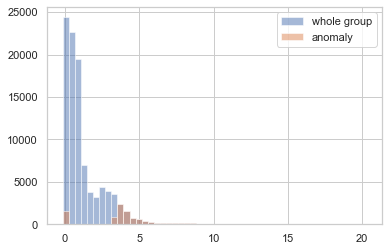

In [28]:
plt.hist(y['Pct_change'], bins = 50, label = 'whole group', alpha = 0.5)
plt.hist(anomaly['Pct_change'], bins = 50, label = 'anomaly', alpha = 0.5)
plt.legend(loc = "best")
plt.show()

# Spline Regression, maybe later

## Explore Anomaly Points